# Forecast next 30 days daily

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [4]:
path = r'raw_data_measurements'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';',decimal=",",
                      names=["DeviceID", "MeasurementID", "date_time", "energy_consumed","temperature", "wind_velocity", "air_humidity", "cloudiness", "day_length", "day_type", "season"])
    li.append(df)

raw_measurements = pd.concat(li, axis=0, ignore_index=True)



raw_measurements

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season
0,5004,1.0,2015.09.01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
1,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5004,2.0,2015.09.01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
3,5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5004,3.0,2015.09.01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6129495,5122,30646.0,2019.02.28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0
6129496,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6129497,5122,30647.0,2019.02.28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0
6129498,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#load device_types file
device_types = pd.read_csv('raw_data_device_types/device-types.csv')

#extract device_type 
device_types['device_type'] = device_types['DeviceCode'].str[-2:]
device_types = device_types.drop(['DeviceCode'], axis=1)
device_types

,DeviceID,device_type
0,5001,CO
1,5002,CO
2,5003,CO
3,5004,CO
4,5005,CW
...,...,...
143,5144,CO
144,5145,CO
145,5146,CO
146,5147,CO


## Transform raw measurements

In [6]:
# drop duplicate, empty rows and reset index
df = raw_measurements.dropna(subset = ['MeasurementID']).reset_index(drop=True)

# format date_time
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y.%m.%d %H:%M:%S')

# merge device types
df = df.merge(device_types, how='left', on='DeviceID')

df

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
3064795,5122,30644.0,2019-02-28 19:00:00,16.955,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064796,5122,30645.0,2019-02-28 20:00:00,16.946,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064797,5122,30646.0,2019-02-28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
3064798,5122,30647.0,2019-02-28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


In [7]:
# separate CO and CW

co_data = df[df['device_type'] == 'CO'].reset_index(drop=True)
co_data

,DeviceID,MeasurementID,date_time,energy_consumed,temperature,wind_velocity,air_humidity,cloudiness,day_length,day_type,season,device_type
0,5004,1.0,2015-09-01 00:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
1,5004,2.0,2015-09-01 01:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
2,5004,3.0,2015-09-01 02:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
3,5004,4.0,2015-09-01 03:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
4,5004,5.0,2015-09-01 04:00:00,0.000,0.000,0.0,0.0,0.0,13.750,1.0,3.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
2237299,5122,30644.0,2019-02-28 19:00:00,16.955,3.517,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237300,5122,30645.0,2019-02-28 20:00:00,16.946,3.268,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237301,5122,30646.0,2019-02-28 21:00:00,16.872,2.764,0.0,0.0,0.0,10.683,1.0,4.0,CO
2237302,5122,30647.0,2019-02-28 22:00:00,16.594,1.958,0.0,0.0,0.0,10.683,1.0,4.0,CO


<function matplotlib.pyplot.show(close=None, block=None)>

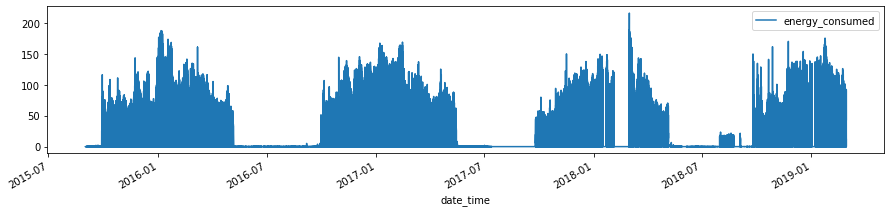

In [8]:
co_data.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [9]:
# sum daily
co_daily = co_data.groupby(co_data['date_time'].dt.date, as_index=True).agg(energy_consumed=('energy_consumed', 'sum'))
co_daily.reset_index(inplace=True)
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


<function matplotlib.pyplot.show(close=None, block=None)>

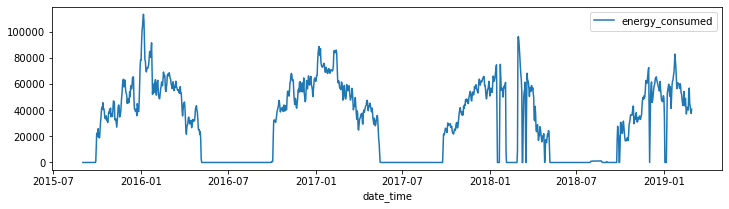

In [10]:
co_daily.plot(x="date_time", y=["energy_consumed"], figsize=(12, 3))
plt.show

### Fill missing values from 2018

In [11]:
co_daily['date_time'] = pd.to_datetime(co_daily['date_time'], format='%Y.%m.%d %H:%M:%S')
co_daily

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


In [12]:
# Zastąp
# Sprawdź wartości z lutego w innych latach
co_for_replacement = co_daily[['date_time', 'energy_consumed']][(co_daily['date_time'].dt.year != 2018)
                                                    & (co_daily['date_time'].dt.day != 29)] #dzień przestępny z innych lat
#(co_daily['date_time'].dt.month == 2)
print(co_for_replacement.to_string())


      date_time  energy_consumed
0    2015-09-01            2.197
1    2015-09-02            6.132
2    2015-09-03           10.326
3    2015-09-04           10.588
4    2015-09-05           15.352
5    2015-09-06           13.276
6    2015-09-07           11.451
7    2015-09-08           13.633
8    2015-09-09           12.055
9    2015-09-10           12.338
10   2015-09-11           23.332
11   2015-09-12           18.745
12   2015-09-13           17.565
13   2015-09-14           15.287
14   2015-09-15           11.079
15   2015-09-16           13.756
16   2015-09-17            3.422
17   2015-09-18           11.050
18   2015-09-19           21.738
19   2015-09-20           29.075
20   2015-09-21           49.756
21   2015-09-22           34.123
22   2015-09-23           18.363
23   2015-09-24           10.893
24   2015-09-25           10.004
25   2015-09-26            9.137
26   2015-09-27            8.353
27   2015-09-28          693.321
29   2015-09-30        22491.684
30   2015-

In [13]:
# zagreguj jako rok 2018
co_for_replacement['date_time'] = co_for_replacement['date_time'].apply(lambda dt: dt.replace(year=2018))
co_for_replacement = co_for_replacement.groupby('date_time', as_index=False).agg(energy_consumed=('energy_consumed', 'mean'))
co_for_replacement

,date_time,energy_consumed
0,2018-01-01,63116.912333
1,2018-01-02,63101.020000
2,2018-01-03,55690.647667
3,2018-01-04,56806.524667
4,2018-01-05,62232.833667
...,...,...
349,2018-12-26,46965.919667
350,2018-12-27,49723.329333
351,2018-12-28,53699.131000
352,2018-12-30,66798.767333


In [14]:
# merge column with new values in co_agg
co_daily_adj = co_daily.copy()
co_daily_adj = co_daily_adj.merge(co_for_replacement[['date_time', 'energy_consumed']],on='date_time',how="left")

#Let's have a look at feb 2018 data (new values vs old, missing values)
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
print(x.to_string())


# Replace missing values for Feb 2018

co_daily_adj['energy_consumed_x'] = np.where((co_daily_adj['energy_consumed_x'] == 0) & (co_daily_adj['energy_consumed_y'].notnull()), co_daily_adj['energy_consumed_y'], co_daily_adj['energy_consumed_x'])
co_daily_adj.drop(["energy_consumed_y"], inplace=True, axis=1)
co_daily_adj.rename(columns={'energy_consumed_x':'energy_consumed'},inplace=True)




      date_time  energy_consumed_x  energy_consumed_y
853  2018-01-01          50858.261       63116.912333
854  2018-01-02          55909.014       63101.020000
855  2018-01-03          56948.669       55690.647667
856  2018-01-04          55891.118       56806.524667
857  2018-01-05          53672.980       62232.833667
858  2018-01-06          53648.840       65530.193333
859  2018-01-07          60642.978       73424.007000
860  2018-01-08          66157.272       78227.544000
861  2018-01-09          64173.715       72287.338667
862  2018-01-10          62179.921       72370.695000
863  2018-01-11          63544.083       72746.621667
864  2018-01-12          65414.169       67373.119000
865  2018-01-13          69180.068       65508.817667
866  2018-01-14          72759.425       67930.011667
867  2018-01-15          74725.707       67105.414333
868  2018-01-16          41249.123       62815.399333
869  2018-01-17              0.000       66889.048000
870  2018-01-18             

In [15]:
# We can see only 0 were replaced with mean values from other years
x = co_daily_adj[:][(co_daily_adj['date_time'].dt.year == 2018)]
print(x.to_string())

      date_time  energy_consumed
853  2018-01-01     50858.261000
854  2018-01-02     55909.014000
855  2018-01-03     56948.669000
856  2018-01-04     55891.118000
857  2018-01-05     53672.980000
858  2018-01-06     53648.840000
859  2018-01-07     60642.978000
860  2018-01-08     66157.272000
861  2018-01-09     64173.715000
862  2018-01-10     62179.921000
863  2018-01-11     63544.083000
864  2018-01-12     65414.169000
865  2018-01-13     69180.068000
866  2018-01-14     72759.425000
867  2018-01-15     74725.707000
868  2018-01-16     41249.123000
869  2018-01-17     66889.048000
870  2018-01-18     71690.144333
871  2018-01-19     74223.816000
872  2018-01-20     71789.635667
873  2018-01-21     72038.704000
874  2018-01-22     47200.498000
875  2018-01-23     75086.202000
876  2018-01-24     64063.215000
877  2018-01-25     55229.971000
878  2018-01-26     55708.657000
879  2018-01-27     56823.463000
880  2018-01-28     54750.509000
881  2018-01-29     50107.845000
882  2018-

<function matplotlib.pyplot.show(close=None, block=None)>

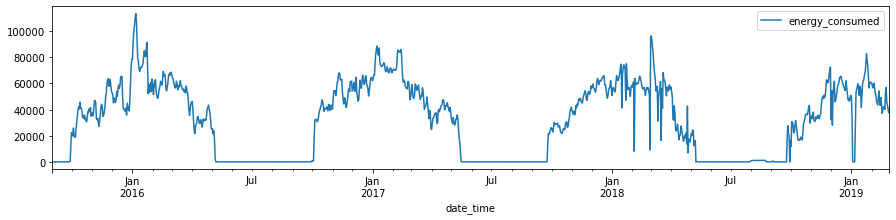

In [16]:
# zeros from 2018 are replaced with means from other years
co_daily_adj.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

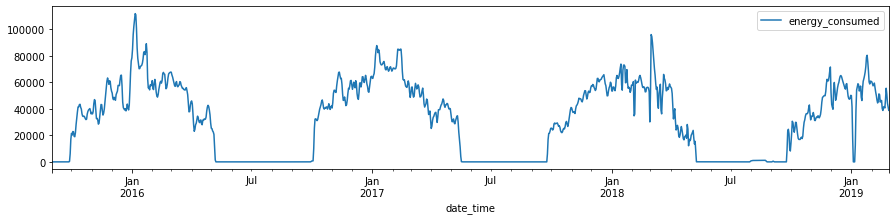

In [17]:
#rolling mean last 2 days
co_daily_adj_mean = co_daily_adj.copy()
co_daily_adj_mean["energy_consumed"] = co_daily_adj_mean['energy_consumed'].rolling(window=2).mean()
co_daily_adj_mean.dropna(inplace=True)
co_daily_adj_mean.plot(x="date_time", y=["energy_consumed"], figsize=(15, 3))
plt.show

In [18]:
# https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
co_daily_adj

,date_time,energy_consumed
0,2015-09-01,2.197
1,2015-09-02,6.132
2,2015-09-03,10.326
3,2015-09-04,10.588
4,2015-09-05,15.352
...,...,...
1272,2019-02-24,45189.764
1273,2019-02-25,43170.373
1274,2019-02-26,39876.236
1275,2019-02-27,37547.258


C:\Users\User\AppData\Local\Temp/ipykernel_14372/827284896.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)


<Figure size 432x288 with 0 Axes>

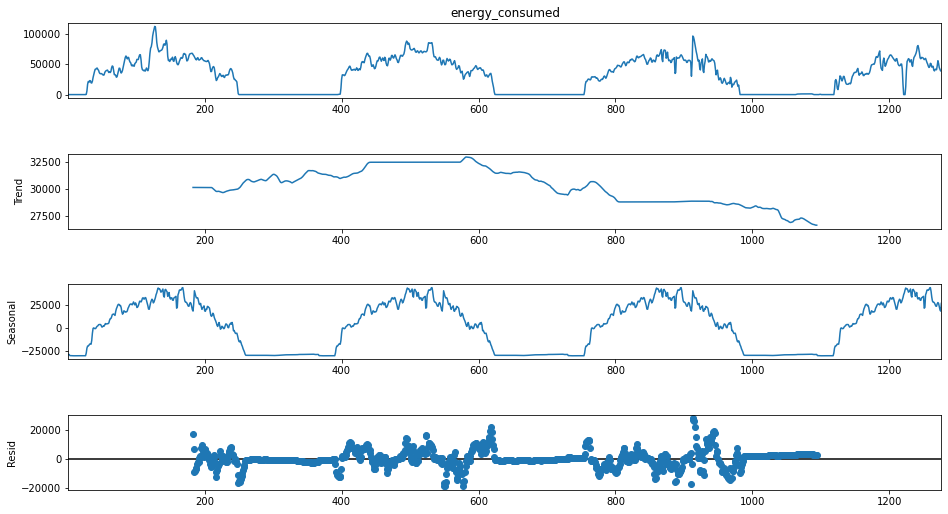

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(co_daily_adj_mean.energy_consumed, freq=364)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [82]:
# just note how to access each part
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid
seasonal

0      -31190.593368
1      -31164.660654
2      -31140.819169
3      -32536.039223
4      -32585.937664
            ...     
1272    27960.475502
1273    21500.084306
1274    26596.258924
1275    12341.882978
1276    44251.687464
Name: seasonal, Length: 1277, dtype: float64

In [20]:
# For testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
                
    rolmean = timeseries.rolling(window=364).mean()
    rolstd = timeseries.rolling(window=364).std() # pd.rolling_std(timeseries, window=364)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

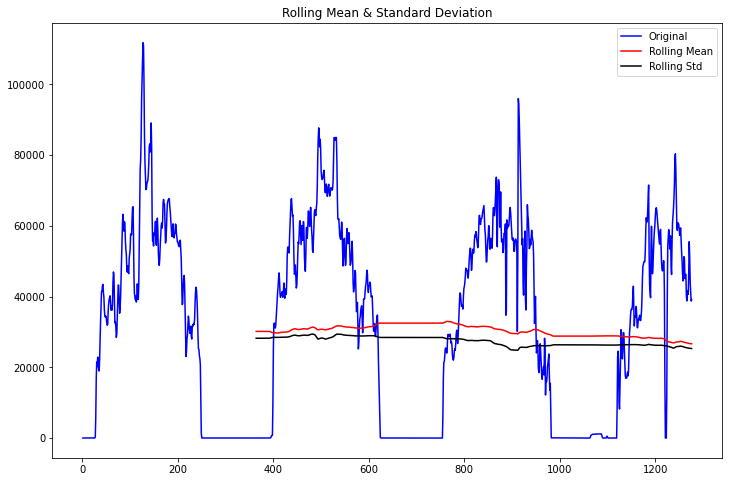

Results of Dickey-Fuller Test:
Test Statistic                   -2.533712
p-value                           0.107486
#Lags Used                       23.000000
Number of Observations Used    1252.000000
Critical Value (1%)              -3.435584
Critical Value (5%)              -2.863851
Critical Value (10%)             -2.568001
dtype: float64


In [21]:
test_stationarity(co_daily_adj_mean['energy_consumed'])

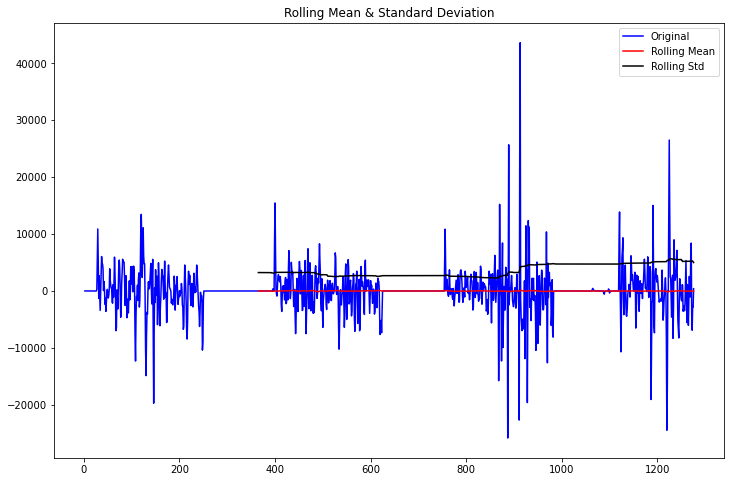

Results of Dickey-Fuller Test:
Test Statistic                -7.800833e+00
p-value                        7.501198e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.251000e+03
Critical Value (1%)           -3.435588e+00
Critical Value (5%)           -2.863853e+00
Critical Value (10%)          -2.568002e+00
dtype: float64


In [22]:
# The first thing we want to do is take a first difference of the data. 
#This should help to eliminate the overall trend from the data.

co_daily_adj_mean['first_difference'] = co_daily_adj_mean.energy_consumed - co_daily_adj_mean.energy_consumed.shift(1)
test_stationarity(co_daily_adj_mean['first_difference'].dropna(inplace=False))

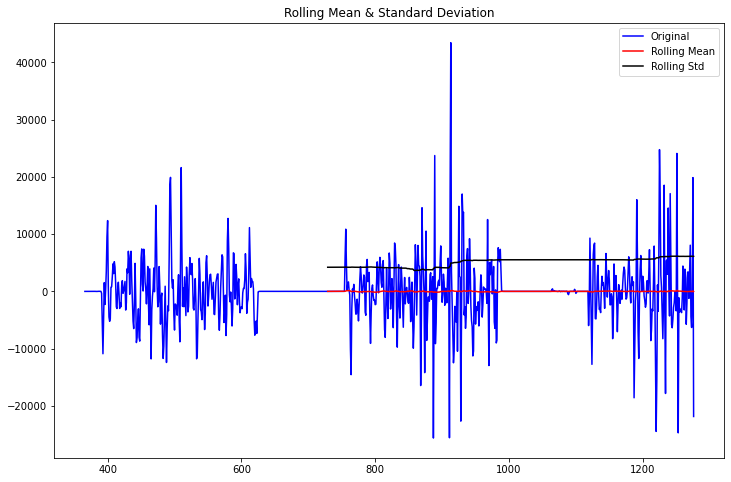

Results of Dickey-Fuller Test:
Test Statistic                -1.041098e+01
p-value                        1.804435e-18
#Lags Used                     2.100000e+01
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [23]:
co_daily_adj_mean['seasonal_first_difference'] = co_daily_adj_mean.first_difference - co_daily_adj_mean.first_difference.shift(364)
test_stationarity(co_daily_adj_mean['seasonal_first_difference'].dropna(inplace=False))

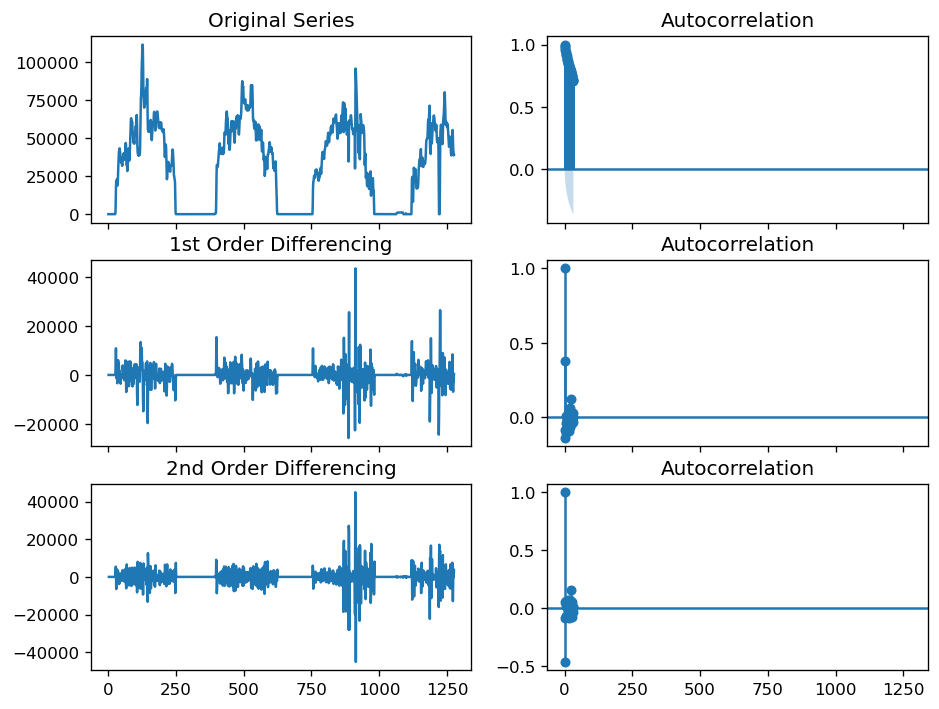

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(co_daily_adj_mean['energy_consumed'][:]); axes[0, 0].set_title('Original Series')
plot_acf(co_daily_adj_mean['energy_consumed'][:], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(co_daily_adj_mean['energy_consumed'][:].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'][:].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(co_daily_adj_mean['energy_consumed'][:].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(co_daily_adj_mean['energy_consumed'][:].diff().diff().dropna(), ax=axes[2, 1])

plt.show()
